In [20]:
#  displays plots directly in this notebook as images
%matplotlib notebook
from scipy.optimize import curve_fit
import numpy as np       # the NumPy library for fast matrix and vector data types and math operations
import matplotlib.pyplot as plt   # functions for plotting, loaded under a convenient name alias 'plt'
import xarray as xr      # matrix and vector containers with labeled axes, used for signals
import holoviews as hv   # a different plotting web-based library mainly for interactive display
import hvplot.xarray     # xaray wrappers for holoviews
import xrscipy           # additional SciPy xarray-compatible wrappers
import xrscipy.signal as dsp    # subpackage convenience: functions for digital signal processing of signals
import xrrandom          # for random sammpling parametrized by xarray objects
import cdb_extras.xarray_support as cdbxr  # a convenient Python library for accessing the COMPASS database

In [3]:
shot1 = cdbxr.Shot(18447)
list(filter(lambda k: 'APD' in k, shot1.keys()))

['APD.light_profile',
 'APD.R_axis',
 'APD.time_axis',
 'APD',
 'APD.density_profile_time_axis',
 'APD.density_profile',
 'APD.light_profile_time_axis']

In [4]:
APD1 = shot1["APD.light_profile"]
APD1

<xarray.DataArray 'APD.light_profile' (time: 70000, R: 18)>
array([[ 1.57104485e-07, -3.03100795e-07, -7.08251959e-07, ...,
         1.01406688e-02,  1.04103867e-02,  6.91619239e-03],
       [ 1.57104485e-07,  1.40588358e-06, -4.64111334e-07, ...,
         1.07761207e-02,  1.09744824e-02,  1.36716054e-02],
       [ 3.50341797e-08,  4.29321080e-07, -1.07446290e-06, ...,
         1.10303014e-02,  9.28219529e-03, -2.54138577e-03],
       ...,
       [-8.70361328e-08,  2.26037577e-06,  2.41699163e-08, ...,
         3.15069772e-03,  7.58990815e-03,  1.16449815e-02],
       [-8.70361328e-08, -6.69311732e-07, -1.56274415e-06, ...,
         5.31123423e-03,  4.01730160e-03, -3.21692707e-03],
       [ 3.50341797e-08,  2.87072733e-06, -1.07446290e-06, ...,
         4.16742078e-03,  7.02581243e-03,  5.56510980e-03]])
Coordinates:
  * time     (time) float64 950.0 950.0 950.0 950.0 ... 1.3e+03 1.3e+03 1.3e+03
  * R        (R) float64 0.6036 0.6133 0.6229 0.6326 ... 0.7483 0.758 0.7676
Attributes:
    record_number:  18447
    revision:       3
    timestamp:      2022-08-05 16:26:45
    data_quality:   UNKNOWN
    units:          V
    description:    Light profile from APD fast camera.

<IPython.core.display.Javascript object>


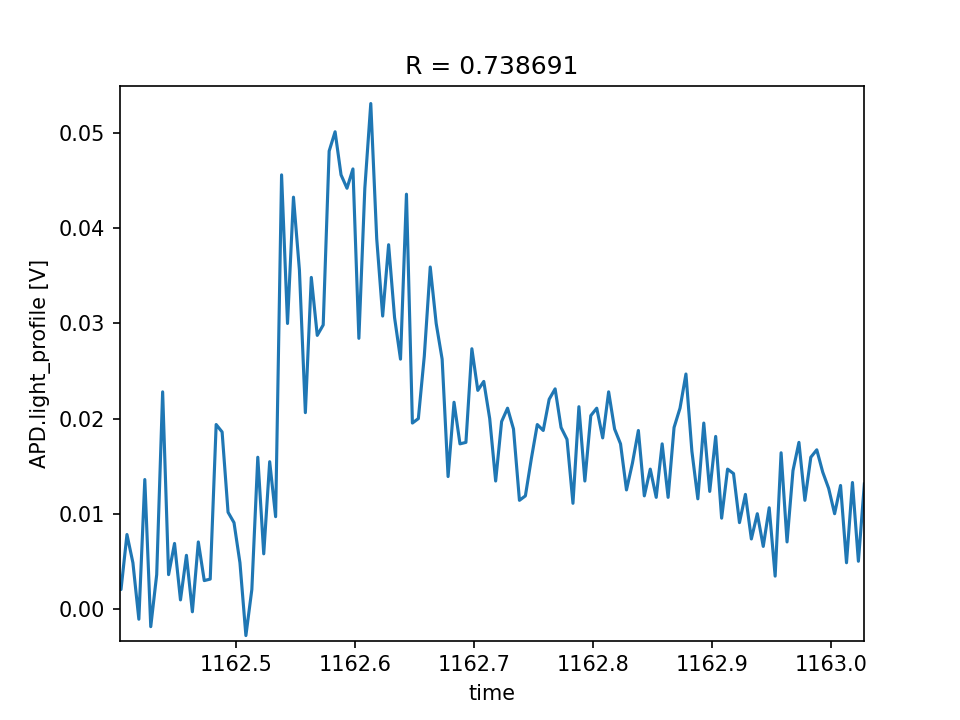

In [5]:
APD1[:,14].plot()

In [34]:
import scipy.io
mat = scipy.io.loadmat('18447_Li_ELMs.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Aug 30 13:53:03 2022',
 '__version__': '1.0',
 '__globals__': [],
 'None': MatlabOpaque([(b'cdb', b'MCOS', b'cdb_client', array([[3707764736],
        [         2],
        [         1],
        [         1],
        [         1],
        [         1]], dtype=uint32))],
              dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]),
 'A': array([[1064.84801258, 1065.04401259],
        [1065.07201259, 1065.3525126 ],
        [1065.49251261, 1065.66451262],
        [1065.77451262, 1066.05351264],
        [1069.5505128 , 1069.91251282],
        [1072.33201294, 1072.56351295],
        [1075.13301307, 1075.41551308],
        [1077.9770132 , 1078.33501322],
        [1082.00451339, 1082.24401341],
        [1085.58601356, 1085.95451358],
        [1088.98301373, 1089.20451374],
        [1091.81301386, 1092.07251387],
        [1094.27651398, 1094.59351399],
        [1097.31401412, 1097.66451414],
        [1100.1

In [35]:
shot1["APD.R_axis"]

<xarray.DataArray 'APD.R_axis' (APD.R_axis: 18)>
array([0.603647, 0.613293, 0.622939, 0.632585, 0.642231, 0.651877,
       0.661523, 0.671169, 0.680815, 0.690461, 0.700107, 0.709753,
       0.719399, 0.729045, 0.738691, 0.748337, 0.757983, 0.767629])
Coordinates:
  * APD.R_axis  (APD.R_axis) float64 0.6036 0.6133 0.6229 ... 0.758 0.7676
Attributes:
    record_number:  18447
    revision:       5
    timestamp:      2022-08-05 16:26:45
    data_quality:   UNKNOWN
    units:          V
    description:    Radial position of midplane (z=0) points in view of the A...

In [14]:
ELM1=APD1[:,14].sel(time=slice(1103.0865144 , 1103.34251441))
ELM1

<xarray.DataArray 'APD.light_profile' (time: 51)>
array([0.01280105, 0.01889753, 0.01561481, 0.02577561, 0.02343081,
       0.02530665, 0.04250186, 0.05469482, 0.05829018, 0.05657066,
       0.03640537, 0.02327449, 0.05235002, 0.03687433, 0.0521937 ,
       0.08470826, 0.04453402, 0.04891098, 0.05406954, 0.04172026,
       0.04343978, 0.02686985, 0.03921913, 0.03281001, 0.02952729,
       0.02405609, 0.01624009, 0.02186761, 0.04719146, 0.04859834,
       0.03984441, 0.03484217, 0.02280553, 0.02171129, 0.01264473,
       0.01108153, 0.01217577, 0.01889753, 0.01373897, 0.01483321,
       0.01639641, 0.02046073, 0.01749065, 0.01827225, 0.01545849,
       0.01702169, 0.01624009, 0.01530217, 0.01389529, 0.01358265,
       0.02139865])
Coordinates:
  * time     (time) float64 1.103e+03 1.103e+03 ... 1.103e+03 1.103e+03
    R        float64 0.7387
Attributes:
    record_number:  18447
    revision:       3
    timestamp:      2022-08-05 16:26:45
    data_quality:   UNKNOWN
    units:          V
    description:    Light profile from APD fast camera.

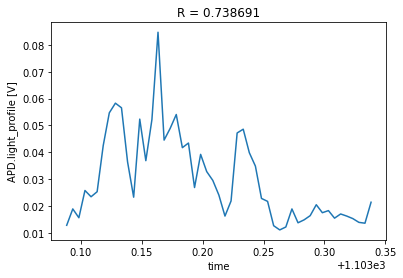

In [57]:
ELM1.plot()

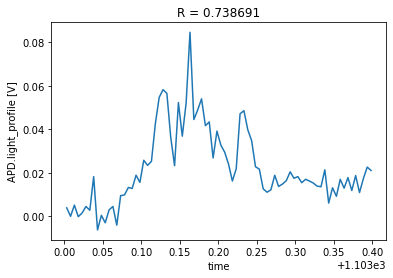

In [59]:
APD1[:,14].sel(time=slice(1103 , 1103.4)).plot()

In [22]:
def func(t, A0, Ar, Ad, tr, td):
    return Ar*exp(t/tr) + Ad*exp(t/td) + A0
A0, Ar, Ad, tr, td = curve_fit(func, ELM1.time, ELM1.values)

AttributeError: 'DataArray' object has no attribute 'to_Array'